## Scope of the study:

### Objective: *Explore the dataset and identify impactful dependencies.*

#### Initial questions

Q1) What is the distribution of each of the data columns (histograms/pie charts)?  
Q2) How each of the 6 factors (age, sex, bmi, children, smoker, region) affects charges?  
Q3) Which age group pays more charges on average?  
Q4) Is smoking correlated with bmi or age?  
Q5) What is the average age in each of the regions?  
Q6) Which region is most populous in this dataset?   
Q7) What is the minimum and maximum number of children?  
Q8) What could be biased in the dataset?  

### Analysis:
Using python, Numpy, pandas and Matplotlib for Data manipulation and visualization the dataset to reach objective.

## Dataset Content

   - age: age of primary beneficiary

   - sex: insurance contractor gender, female, male

   - bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

   - Children: Number of children covered by health insurance / Number of dependents

   - Smoker: Smoking

   - Region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

   - Charges: Individual medical costs billed by health insurance


## Step 1: Importing necessary Libraries & Loading dataset

In [1]:
#importinig Neceassay libaraies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
insurance = pd.read_csv('./dataset/insurance.csv')
print(insurance.shape)
insurance.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Step 2: Exploring Data set

In [3]:
insurance.describe().round(3)

,age,bmi,children,charges
count,1338.000,1338.000,1338.000,1338.000
mean,39.207,30.663,1.095,13270.422
std,14.050,6.098,1.205,12110.011
min,18.000,15.960,0.000,1121.874
25%,27.000,26.296,0.000,4740.287
50%,39.000,30.400,1.000,9382.033
75%,51.000,34.694,2.000,16639.913
max,64.000,53.130,5.000,63770.428


In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### QUESTION:1 What is the distribution of each of the data columns (histograms/pie charts)?

#### histogram : age

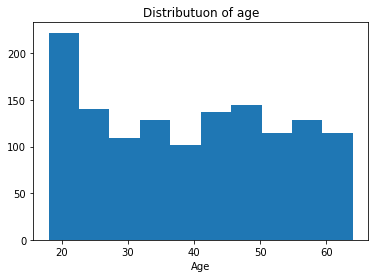

In [5]:
fig, ax = plt.subplots()
ax.hist(insurance['age'])
ax.set_xlabel('Age')
ax.set_title('Distributuon of age')
plt.show()

### pie cahrt: sex

In [6]:
genders = insurance.groupby('sex').size()
genders

sex
female    662
male      676
dtype: int64

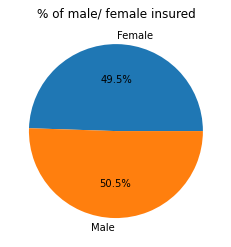

In [7]:
fig, ax = plt.subplots()
my_labels = 'Female','Male'
ax.pie(genders, labels=my_labels, autopct='%1.1f%%', radius=1) # by default radius is also
ax.set_title('% of male/ female insured')
plt.show()

### histogram : bmi

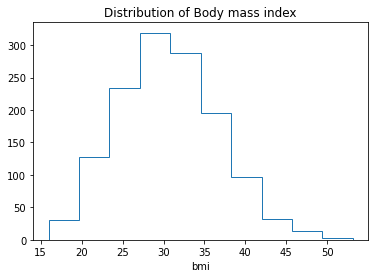

In [8]:
fig, ax = plt.subplots()
ax.hist(insurance['bmi'], histtype='step')
ax.set_xlabel('bmi')
ax.set_title('Distribution of Body mass index')
plt.show()

### piechart : children

In [9]:
childern_size = insurance.groupby(insurance['children']).size()
childern_size

children
0    574
1    324
2    240
3    157
4     25
5     18
dtype: int64

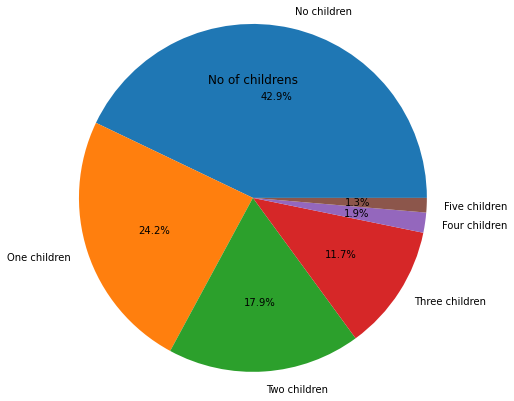

In [10]:
fig, ax = plt.subplots()
my_labels = 'No children', 'One children', 'Two children', 'Three children', 'Four children', 'Five children'
ax.pie(childern_size, labels=my_labels, autopct='%1.1f%%', radius=2) # by default radius is also
ax.set_title('No of childrens')
plt.show()

### pie chart : smoker

In [11]:
smoker_size = insurance.groupby('smoker').size()
smoker_size

smoker
no     1064
yes     274
dtype: int64

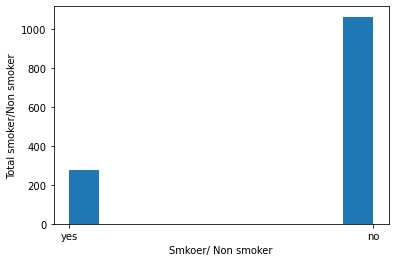

In [12]:
fig, ax = plt.subplots()
ax.hist(insurance['smoker'],histtype='bar')
ax.set_xlabel('Smkoer/ Non smoker')
ax.set_ylabel('Total smoker/Non smoker')
plt.show()

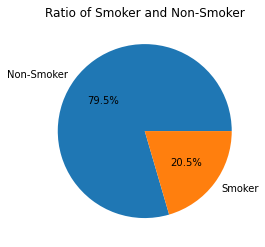

In [13]:
fig, ax = plt.subplots()
my_labels = 'Non-Smoker', 'Smoker'
ax.pie(smoker_size, labels = my_labels, autopct='%1.1f%%')
ax.set_title('Ratio of Smoker and Non-Smoker')
plt.show()

### piechart : region

In [14]:
region_size = insurance.groupby('region').size()
region_size

region
northeast    324
northwest    325
southeast    364
southwest    325
dtype: int64

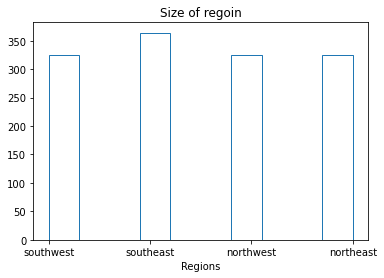

In [15]:
fig, ax = plt.subplots()
ax.hist(insurance['region'], histtype='step')
ax.set_xlabel('Regions')
ax.set_title('Size of regoin')
plt.show()

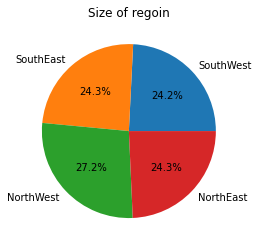

In [16]:
fig, ax = plt.subplots()
my_labels = 'SouthWest', 'SouthEast', 'NorthWest', 'NorthEast'
ax.pie(region_size, labels = my_labels, autopct = '%1.1f%%')
ax.set_title('Size of regoin')
plt.show()

### histogram: charges

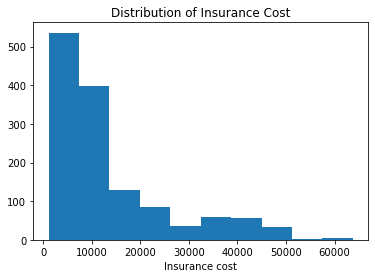

In [17]:
fig, ax = plt.subplots()
ax.hist(insurance['charges'])
ax.set_xlabel('Insurance cost')
ax.set_title('Distribution of Insurance Cost')
plt.show()

#### QUESTION :2 How each of the 6 factors (age, sex, bmi, children, smoker, region) affects charges? 

##### age()

In [38]:
age_slab_label = ['0-25years', '26-40years', '41-60years', '60+ years']
age_slab = [0, 25, 40, 60, 100]

age_group = pd.cut(insurance['age'], bins=age_slab, labels= age_slab_label)
age_group

0        0-25years
1        0-25years
2       26-40years
3       26-40years
4       26-40years
           ...    
1333    41-60years
1334     0-25years
1335     0-25years
1336     0-25years
1337     60+ years
Name: age, Length: 1338, dtype: category
Categories (4, object): ['0-25years' < '26-40years' < '41-60years' < '60+ years']

In [46]:
age_group_size = age_group.to_frame(0).groupby(0)[0].size()
age_group_size

0
0-25years     306
26-40years    395
41-60years    546
60+ years      91
Name: 0, dtype: int64

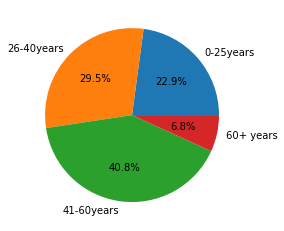

In [62]:
# plt.pie(age_group_size, labels= age_slab_label, autopct = '%1.1%%')
plt.pie(age_group_size,labels = age_slab_label,autopct='%1.1f%%')
plt.show()

#### sex()

In [75]:
sex_charges = insurance.groupby('sex').mean().round(2)['charges'].sort_values(ascending=False)
sex_charges
# Use can also use this code
# sex_charges = insurance.groupby('sex').mean().round(2).sort_values('charges', ascending=False)
# sex_charges['charges']


sex
male      13956.75
female    12569.58
Name: charges, dtype: float64

#### charges()

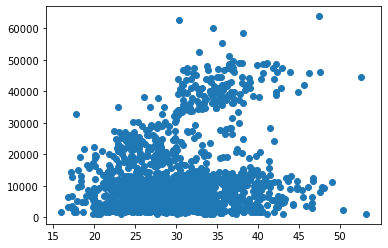

In [78]:
plt.scatter(insurance['bmi'], insurance['charges'])
plt.show()

In [112]:
bmi_slab_labels = ['UnderWeight', 'Normal', 'Overweight', 'Obese']
bmi_slab = [0, 18.5, 25, 30, 100]

bmi_labeling = pd.cut(insurance['bmi'], labels= bmi_slab_labels, bins = bmi_slab)
bmi_group

0       Overweight
1            Obese
2            Obese
3           Normal
4       Overweight
           ...    
1333         Obese
1334         Obese
1335         Obese
1336    Overweight
1337    Overweight
Name: bmi, Length: 1338, dtype: category
Categories (4, object): ['UnderWeight' < 'Normal' < 'Overweight' < 'Obese']

In [113]:
bmi_group_size = bmi_labeling.to_frame(0).groupby(0)[0].size()
bmi_group_size

0
UnderWeight     21
Normal         226
Overweight     386
Obese          705
Name: 0, dtype: int64

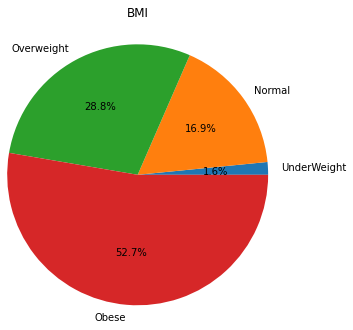

In [122]:
plt.pie(bmi_group_size, labels= bmi_slab_labels, autopct = '%1.1f%%', radius=1.5)
plt.title("BMI", y = 1.2)
plt.show()

In [123]:
bmi_charges = insurance[['bmi', 'charges']]
bmi_charges['bmi'] = pd.cut(insurance['bmi'], labels=bmi_slab_labels, bins= bmi_slab)
bmi_charges

<ipython-input-123-1af48417ae0b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bmi_charges['bmi'] = pd.cut(insurance['bmi'], labels=bmi_slab_labels, bins= bmi_slab)


,bmi,charges
0,Overweight,16884.92400
1,Obese,1725.55230
2,Obese,4449.46200
3,Normal,21984.47061
4,Overweight,3866.85520
...,...,...
1333,Obese,10600.54830
1334,Obese,2205.98080
1335,Obese,1629.83350
1336,Overweight,2007.94500


In [124]:
bmi_charges.groupby('bmi').mean().round(2)

,charges
bmi,
UnderWeight,8657.62
Normal,10435.44
Overweight,10997.80
Obese,15560.93


### QUESTION :3 Which age group pays more charges on average? 

In [50]:
age_charge = insurance[['age', 'charges']]
age_charge['age'] = pd.cut(insurance['age'], bins = age_slab, labels= age_slab_label)
age_charge

<ipython-input-50-7a64e7218eef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_charge['age'] = pd.cut(insurance['age'], bins = age_slab, labels= age_slab_label)


,age,charges
0,0-25years,16884.92400
1,0-25years,1725.55230
2,26-40years,4449.46200
3,26-40years,21984.47061
4,26-40years,3866.85520
...,...,...
1333,41-60years,10600.54830
1334,0-25years,2205.98080
1335,0-25years,1629.83350
1336,0-25years,2007.94500


In [53]:
age_charge.groupby('age').mean().round(2)

,charges
age,
0-25years,9087.02
26-40years,11096.68
41-60years,15888.76
60+ years,21063.16


### What are the cost groups of the insured?

In [23]:
slabe_label = ['0-10K$', '10k-20k$', '20-30K$', ' > 30k']
slabe = [0, 10000, 20000, 30000, 100000]

scheme = pd.cut(insurance['charges'], bins= slabe, labels= slabe_label)
print(scheme)

0       10k-20k$
1         0-10K$
2         0-10K$
3        20-30K$
4         0-10K$
          ...   
1333    10k-20k$
1334      0-10K$
1335      0-10K$
1336      0-10K$
1337     20-30K$
Name: charges, Length: 1338, dtype: category
Categories (4, object): ['0-10K$' < '10k-20k$' < '20-30K$' < ' > 30k']


In [30]:
cost_groups_size = scheme.to_frame(0).groupby(0)[0].size()
print(cost_groups_size)

0
0-10K$      712
10k-20k$    353
20-30K$     111
 > 30k      162
Name: 0, dtype: int64


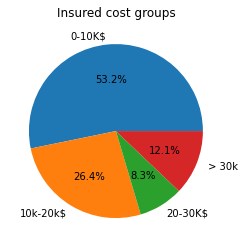

In [36]:
plt.pie(cost_groups_size,labels = slabe_label,autopct='%1.1f%%')
plt.title('Insured cost groups')
# plt.title('Insured cost groups', y=1.5) # measure th distance between pic chart & title
plt.show()